[[ 24. 481.   0.  28.   0.   0.]
 [ 29. 685.   0.  33.   0.   0.]
 [ 36. 945.   0.  43.   0.   0.]
 [ 14. 300.   0.  17.   0.   0.]]
[[ 24.   481.    20.    28.    17.     1.17]
 [ 29.   685.    23.    33.    20.     1.14]
 [ 36.   945.    26.    43.    21.     1.19]
 [ 14.   300.    21.    17.    17.     1.21]]


TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 640x480 with 1 Axes>

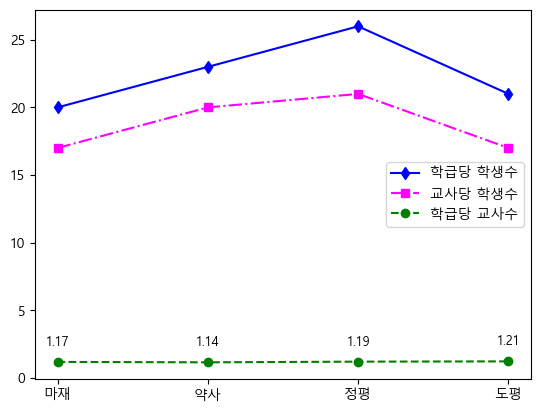

In [43]:
# 실습) 예제-15에 학급당 교사수를 그래프로 추가 (실수로 추가 할 것)

import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font',family='Malgun Gothic')

f = open('school_2019.csv','r',encoding='utf-8')
lines = csv.reader(f)
header = next(lines)

schools = {}

for line in lines:
    if('광주' in line[0]) and ('마재' in line[1]):
        schools.update({'마재':[line[2],line[3],line[4]]})
    if('울산' in line[0]) and ('약사' in line[1]):
        schools.update({'약사':[line[2],line[3],line[4]]})
    if('용인' in line[0]) and ('정평' in line[1]):
        schools.update({'정평':[line[2],line[3],line[4]]}) 
    if('제주' in line[0]) and ('도평' in line[1]):
        schools.update({'도평':[line[2],line[3],line[4]]})   

school = list(schools.values())

data = np.zeros((4,3),dtype='float64')

for i in range(len(schools)):
    for j in range(3):
        data[i][j] = school[i][j]

#print(data)
"""
0 학급수
1 학생수
2 학급당 학생수  
3 교사수
4 교사당 학생수
5 학급당 교사수
"""
data = np.insert(data,2,0,axis = 1) 
data = np.insert(data,4,0,axis = 1)
data = np.insert(data,5,0, axis = 1)
print(data)

#print(data.shape[0])

# data[5] = data[5].astype(np.float64)
# print(data[1][5].dtype)

row = data.shape[0]
for i in range(row):
    data[i][2] = int(data[i][1]/data[i][0])
    data[i][4] = int(data[i][1]/data[i][3])
    data[i][5] = round(data[i][3]/data[i][0],2)

print(data)

xdata = ['마재','약사','정평','도평']
plt.plot(xdata,da,label='학생수',color='red', linestyle='--',marker='x')
plt.plot(xdata,data[:,3],label='교사수',color='blue', linestyle=':',marker='d')
plt.title('학생수와 교사수')
plt.legend(loc='best')
plt.show()

plt.plot(xdata,data[:,2],label='학급당 학생수', color='blue', linestyle='-', marker='d')
plt.plot(xdata,data[:,4],label='교사당 학생수', color='magenta', linestyle='-.',marker='s')
plt.plot(xdata,data[:,5],label='학급당 교사수', color='green',linestyle='--',marker='o')
plt.legend(loc='best')
for i in range(len(xdata)):
    plt.text(xdata[i], data[i][5]+1, f'{data[i][5]}', ha='center', va='bottom', fontsize=9)

plt.show()